In [ ]:
# Importing Libraries

import warnings
warnings.filterwarnings('ignore')

import datetime
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
sns.set()

from datetime import timedelta
from sklearn.impute import SimpleImputer
from pandas_profiling import ProfileReport
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.basemap import Basemap

In [ ]:
# Load the data, output the first 5 rows

df = pd.read_csv('data/globalterrorism.csv', encoding = "ISO-8859-1")
df.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [ ]:
# Output descriptive statistics of data

df.describe()

eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.498343   
std         0.208063     112.414535       2.933408      18.569242   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      78.000000       5.000000      11.510046   
50%         0.000000      98.000000       6.000000      31.467463   
75%         0.000000     160.000000      10.000000      34.685087   
max         1.000000    1004.000000      12.000000      74.633553   

          longitude    specificity  ...     ransomamt   ransomamtus  \
count  1.771340e+05  181685.000000  ...  1.350000e+03  5.630000e+02   
mean  -4.586957e+02       1.451452  ...  3.172530e+06  5.784865e+05   
std    2.047790e+05       0.995430  ...  3.021157e+07  7.077924e+06   
min   -8.618590e+07       1.000000  ... -9.900000e+01 -9.900000e+01   
25%    4.545640e+00       1.000000  ...  0.000000e+00  0.000000e+00   
50%    4.324651e+01       1.000000  ...  1.500000e+04  0.000000e+00   
75%    6.871033e+01       1.000000  ...  4.000000e+05  0.000000e+00   
max    1.793667e+02       5.000000  ...  1.000000e+09  1.320000e+08   

         ransompaid  ransompaidus  hostkidoutcome     nreleased  \
count  7.740000e+02    552.000000    10991.000000  10400.000000   
mean   7.179437e+05    240.378623        4.629242    -29.018269   
std    1.014392e+07   2940.967293        2.035360     65.720119   
min   -9.900000e+01    -99.000000        1.000000    -99.000000   
25%   -9.900000e+01      0.000000        2.000000    -99.000000   
50%    0.000000e+00      0.000000        4.000000      0.000000   
75%    1.273412e+03      0.000000        7.000000      1.000000   
max    2.750000e+08  48000.000000        7.000000   2769.000000   

             INT_LOG       INT_IDEO       INT_MISC        INT_ANY  
count  181691.000000  181691.000000  181691.000000  181691.000000  
mean       -4.543731      -4.464398       0.090010      -3.945952  
std         4.543547       4.637152       0.568457       4.691325  
min        -9.000000      -9.000000      -9.000000      -9.000000  
25%        -9.000000      -9.000000       0.000000      -9.000000  
50%        -9.000000      -9.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 77 columns]

In [ ]:
# Print the size of the dataset

df.shape

(181691, 135)

In [ ]:
# Determining the number of completely filled objects, the percentage and the number of missing values in features:
# We will need this several times for EDA, so I will create two functions for this purpose

def print_useful_rows_info(df):
    print('Number of completely filled objects from the entire sample:', len(df.dropna()))
    print('Percent of completely filled objects from the entire sample:', round(len(df.dropna()) / len(df) * 100, 2))
print_useful_rows_info(df)
missing_values = ((df.isna().sum() / len(df)) * 100).sort_values(ascending=False)
print(f'Percent of missing values:\n' + f'{missing_values}')

Number of completely filled objects from the entire sample: 0
Percent of completely filled objects from the entire sample: 0.0
Percent of missing values:
gsubname3           99.988992
weapsubtype4_txt    99.961473
weapsubtype4        99.961473
weaptype4           99.959822
weaptype4_txt       99.959822
                      ...    
suicide              0.000000
success              0.000000
crit3                0.000000
property             0.000000
eventid              0.000000
Length: 135, dtype: float64


In [ ]:
def get_missing_values(df):
    n = 0
    missing_values = ((df.isna().sum() / len(df)) * 100).sort_values(ascending=False)
    for i in range(0, len(missing_values)):
        if missing_values[i] > 0:
            print(missing_values.index[i], '-', df.loc[:, missing_values.index[i]].isna().sum())
            n += 1
        if n == 0 and i == len(missing_values) - 1:
            print(n)
print('Number of missing values in columns:')
get_missing_values(df)

Number of missing values in columns:
gsubname3 - 181671
weapsubtype4_txt - 181621
weapsubtype4 - 181621
weaptype4 - 181618
weaptype4_txt - 181618
claimmode3 - 181558
claimmode3_txt - 181558
gsubname2 - 181531
claim3 - 181373
guncertain3 - 181371
gname3 - 181367
divert - 181367
attacktype3 - 181263
attacktype3_txt - 181263
ransomnote - 181177
ransompaidus - 181139
ransomamtus - 181128
claimmode2 - 181075
claimmode2_txt - 181075
ransompaid - 180917
corp3 - 180665
targsubtype3 - 180594
targsubtype3_txt - 180594
natlty3_txt - 180544
natlty3 - 180544
target3 - 180516
targtype3 - 180515
targtype3_txt - 180515
ransomamt - 180341
weapsubtype3_txt - 179998
weapsubtype3 - 179998
weaptype3_txt - 179828
weaptype3 - 179828
claim2 - 179801
guncertain2 - 179736
gname2 - 179678
resolution - 179471
kidhijcountry - 178386
nhours - 177628
compclaim - 176852
gsubname - 175801
attacktype2 - 175377
attacktype2_txt - 175377
ndays - 173567
approxdate - 172452
corp2 - 171574
nreleased - 171291
targsubtype2 - 1

In [ ]:
# Leave only the columns of interest for analysis, also filtering out columns with a large number of gaps

df = df[['nwound', 'targsubtype1_txt', 'nkill', 'longitude', 'latitude', 'natlty1_txt', 'target1', 'city', 'iyear', 'iday',
         'imonth', 'targtype1_txt', 'gname', 'region_txt', 'country_txt', 'weaptype1_txt', 'attacktype1_txt', 'success']]
df.head()

nwound                                   targsubtype1_txt  nkill  \
0     0.0                                     Named Civilian    1.0   
1     0.0  Diplomatic Personnel (outside of embassy, cons...    0.0   
2     0.0                    Radio Journalist/Staff/Facility    1.0   
3     NaN                                  Embassy/Consulate    NaN   
4     NaN                                  Embassy/Consulate    NaN   

    longitude   latitude         natlty1_txt                  target1  \
0  -69.951164  18.456792  Dominican Republic             Julio Guzman   
1  -99.086624  19.371887             Belgium  Nadine Chaval, daughter   
2  120.599741  15.478598       United States                 Employee   
3   23.762728  37.997490       United States             U.S. Embassy   
4  130.396361  33.580412       United States           U.S. Consulate   

            city  iyear  iday  imonth                targtype1_txt  \
0  Santo Domingo   1970     2       7  Private Citizens & Property   
1    Mexico city   1970     0       0      Government (Diplomatic)   
2        Unknown   1970     0       1          Journalists & Media   
3         Athens   1970     0       1      Government (Diplomatic)   
4        Fukouka   1970     0       1      Government (Diplomatic)   

                                gname                   region_txt  \
0                              MANO-D  Central America & Caribbean   
1  23rd of September Communist League                North America   
2                             Unknown               Southeast Asia   
3                             Unknown               Western Europe   
4                             Unknown                    East Asia   

          country_txt weaptype1_txt                 attacktype1_txt  success  
0  Dominican Republic       Unknown                   Assassination        1  
1              Mexico       Unknown     Hostage Taking (Kidnapping)        1  
2         Philippines       Unknown                   Assassination        1  
3              Greece    Explosives               Bombing/Explosion        1  
4               Japan    Incendiary  Facility/Infrastructure Attack        1

In [ ]:
# Check the number of missing values in features

get_missing_values(df)

nwound - 16311
targsubtype1_txt - 10373
nkill - 10313
longitude - 4557
latitude - 4556
natlty1_txt - 1559
target1 - 636
city - 434


In [ ]:
# Fill the gaps in the data: for categorical data - with the new value "unknown", for numeric - 0 (will assume that if there is
# no information, then the number of killed or wounded is 0)

imp_const_unknown = SimpleImputer(strategy='constant', fill_value='Unknown')
unk_cols = ['city', 'target1', 'natlty1_txt', 'targsubtype1_txt']
df[unk_cols] = imp_const_unknown.fit_transform(df[unk_cols])

imp_const_0 = SimpleImputer(strategy='constant', fill_value=0)
zero_cols = ['nwound', 'nkill']
df[zero_cols] = imp_const_0.fit_transform(df[zero_cols])
df.head()

nwound                                   targsubtype1_txt  nkill  \
0     0.0                                     Named Civilian    1.0   
1     0.0  Diplomatic Personnel (outside of embassy, cons...    0.0   
2     0.0                    Radio Journalist/Staff/Facility    1.0   
3     0.0                                  Embassy/Consulate    0.0   
4     0.0                                  Embassy/Consulate    0.0   

    longitude   latitude         natlty1_txt                  target1  \
0  -69.951164  18.456792  Dominican Republic             Julio Guzman   
1  -99.086624  19.371887             Belgium  Nadine Chaval, daughter   
2  120.599741  15.478598       United States                 Employee   
3   23.762728  37.997490       United States             U.S. Embassy   
4  130.396361  33.580412       United States           U.S. Consulate   

            city  iyear  iday  imonth                targtype1_txt  \
0  Santo Domingo   1970     2       7  Private Citizens & Property   
1    Mexico city   1970     0       0      Government (Diplomatic)   
2        Unknown   1970     0       1          Journalists & Media   
3         Athens   1970     0       1      Government (Diplomatic)   
4        Fukouka   1970     0       1      Government (Diplomatic)   

                                gname                   region_txt  \
0                              MANO-D  Central America & Caribbean   
1  23rd of September Communist League                North America   
2                             Unknown               Southeast Asia   
3                             Unknown               Western Europe   
4                             Unknown                    East Asia   

          country_txt weaptype1_txt                 attacktype1_txt  success  
0  Dominican Republic       Unknown                   Assassination        1  
1              Mexico       Unknown     Hostage Taking (Kidnapping)        1  
2         Philippines       Unknown                   Assassination        1  
3              Greece    Explosives               Bombing/Explosion        1  
4               Japan    Incendiary  Facility/Infrastructure Attack        1

In [ ]:
# Check data statistics again

df.describe()

nwound          nkill     longitude       latitude  \
count  181691.000000  181691.000000  1.771340e+05  177135.000000   
mean        2.883296       2.266860 -4.586957e+02      23.498343   
std        34.309747      11.227057  2.047790e+05      18.569242   
min         0.000000       0.000000 -8.618590e+07     -53.154613   
25%         0.000000       0.000000  4.545640e+00      11.510046   
50%         0.000000       0.000000  4.324651e+01      31.467463   
75%         2.000000       2.000000  6.871033e+01      34.685087   
max      8191.000000    1570.000000  1.793667e+02      74.633553   

               iyear           iday         imonth        success  
count  181691.000000  181691.000000  181691.000000  181691.000000  
mean     2002.638997      15.505644       6.467277       0.889598  
std        13.259430       8.814045       3.388303       0.313391  
min      1970.000000       0.000000       0.000000       0.000000  
25%      1991.000000       8.000000       4.000000       1.000000  
50%      2009.000000      15.000000       6.000000       1.000000  
75%      2014.000000      23.000000       9.000000       1.000000  
max      2017.000000      31.000000      12.000000       1.000000

In [ ]:
# Standard deviation of longitude is very high, should be checked for outliers

outlier = (df.longitude < -180) | (df.longitude > 180)
print('\nNumber of outliers - ', outlier.sum())
df[outlier]


Number of outliers -  1


nwound targsubtype1_txt  nkill   longitude   latitude natlty1_txt  \
17658     0.0   Other Facility    5.0 -86185896.0  12.643985   Nicaragua   

                  target1              city  iyear  iday  imonth  \
17658  tour of El Oregano  Valle El Oregano   1982    24      12   

      targtype1_txt    gname                   region_txt country_txt  \
17658      Tourists  Contras  Central America & Caribbean   Nicaragua   

      weaptype1_txt attacktype1_txt  success  
17658      Firearms   Armed Assault        1

In [ ]:
# Delete a row with a longitude outlier from the dataset

df = df[df.longitude != df.longitude[outlier].values[0]]

In [ ]:
# Calculate the average latitude and longitude for countries throughout the dataset to fill gaps in coordinates

stat_coords_mean = df.groupby(['country_txt'], as_index='country_txt').agg({'longitude': 'mean', 'latitude': 'mean'})
stat_coords_mean = stat_coords_mean.rename(columns={'longitude': 'longitude_mean', 'latitude': 'latitude_mean'})
stat_coords_mean

longitude_mean  latitude_mean
country_txt                               
Afghanistan       67.191111      33.878726
Albania           19.838797      41.077462
Algeria            3.397750      36.223004
Andorra                 NaN            NaN
Angola            14.954111     -10.069548
...                     ...            ...
Yemen             45.237704      14.407685
Yugoslavia        20.373192      43.266686
Zaire             20.943970      -3.830672
Zambia            27.510312     -14.900931
Zimbabwe          30.283676     -18.804864

[205 rows x 2 columns]

In [ ]:
# Fill the gaps in latitude and longitude with averages for the countries

index_list_long = list(df.longitude[df.longitude.isna()].index)
index_list_lat = list(df.latitude[df.latitude.isna()].index)
index_list = list(set(index_list_long + index_list_lat))

for i in index_list:
    country = df.country_txt[i]
    df.loc[i, 'latitude'] = stat_coords_mean.latitude_mean[country]
    df.loc[i, 'longitude'] = stat_coords_mean.longitude_mean[country]

In [ ]:
# Check the number of missing values in features again

get_missing_values(df)

longitude - 1
latitude - 1


In [ ]:
# Delete a row with a longitude/latitude missing value from the dataset

df = df[df.longitude.notna()]
get_missing_values(df)

0


In [ ]:
# Check a longitude/latitude for outliers again

outlier = (df.longitude < -180) | (df.longitude > 180)
print('Number of outliers - ', outlier.sum())

Number of outliers -  0


In [ ]:
# Replace value that have a long length in weap_type for convenience of displaying on charts

df.weaptype1_txt[df.weaptype1_txt == 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'] = 'Vehicle'

In [ ]:
# Check the info about the received dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181689 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   nwound            181689 non-null  float64
 1   targsubtype1_txt  181689 non-null  object 
 2   nkill             181689 non-null  float64
 3   longitude         181689 non-null  float64
 4   latitude          181689 non-null  float64
 5   natlty1_txt       181689 non-null  object 
 6   target1           181689 non-null  object 
 7   city              181689 non-null  object 
 8   iyear             181689 non-null  int64  
 9   iday              181689 non-null  int64  
 10  imonth            181689 non-null  int64  
 11  targtype1_txt     181689 non-null  object 
 12  gname             181689 non-null  object 
 13  region_txt        181689 non-null  object 
 14  country_txt       181689 non-null  object 
 15  weaptype1_txt     181689 non-null  object 
 16  attacktype1_txt   18

In [ ]:
# Cast the data type of nkill and nwound to an integer

df.nwound = df.nwound.astype('int')
df.nkill = df.nkill.astype('int')
df.head()

nwound                                   targsubtype1_txt  nkill  \
0       0                                     Named Civilian      1   
1       0  Diplomatic Personnel (outside of embassy, cons...      0   
2       0                    Radio Journalist/Staff/Facility      1   
3       0                                  Embassy/Consulate      0   
4       0                                  Embassy/Consulate      0   

    longitude   latitude         natlty1_txt                  target1  \
0  -69.951164  18.456792  Dominican Republic             Julio Guzman   
1  -99.086624  19.371887             Belgium  Nadine Chaval, daughter   
2  120.599741  15.478598       United States                 Employee   
3   23.762728  37.997490       United States             U.S. Embassy   
4  130.396361  33.580412       United States           U.S. Consulate   

            city  iyear  iday  imonth                targtype1_txt  \
0  Santo Domingo   1970     2       7  Private Citizens & Property   
1    Mexico city   1970     0       0      Government (Diplomatic)   
2        Unknown   1970     0       1          Journalists & Media   
3         Athens   1970     0       1      Government (Diplomatic)   
4        Fukouka   1970     0       1      Government (Diplomatic)   

                                gname                   region_txt  \
0                              MANO-D  Central America & Caribbean   
1  23rd of September Communist League                North America   
2                             Unknown               Southeast Asia   
3                             Unknown               Western Europe   
4                             Unknown                    East Asia   

          country_txt weaptype1_txt                 attacktype1_txt  success  
0  Dominican Republic       Unknown                   Assassination        1  
1              Mexico       Unknown     Hostage Taking (Kidnapping)        1  
2         Philippines       Unknown                   Assassination        1  
3              Greece    Explosives               Bombing/Explosion        1  
4               Japan    Incendiary  Facility/Infrastructure Attack        1

In [ ]:
# Rename the columns for ease of display on charts

df = df.rename(columns={'nwound': 'wounded_number', 'targsubtype1_txt': 'target_subtype', 'nkill': 'killed_number',
                        'natlty1_txt': 'terrorists_nationality', 'target1': 'target', 'iyear': 'year', 'iday': 'day',
                        'imonth': 'month', 'targtype1_txt': 'target_type', 'gname': 'terrorist_group_name',
                        'region_txt': 'region', 'country_txt': 'country', 'weaptype1_txt': 'weap_type',
                        'attacktype1_txt': 'attack_type'})

In [ ]:
# Checking the dataset for duplicate rows

print('Number of duplicated rows - ', len(df[df.duplicated()].values))

Number of duplicated rows -  10543


In [ ]:
df[df.duplicated()]

wounded_number                                   target_subtype  \
68                   0                            Retail/Grocery/Bakery   
88                   0                                      Electricity   
89                   0                                      Electricity   
90                   0                                      Electricity   
128                  0   Police Patrol (including vehicles and convoys)   
...                ...                                              ...   
181345               0                     Political Party Member/Rally   
181397               0                                      Electricity   
181431               0                              Military Checkpoint   
181634               0                                          Unknown   
181657               0  Police Building (headquarters, station, school)   

        killed_number   longitude   latitude terrorists_nationality  \
68                  0 -122.280022  37.874043          United States   
88                  0  -96.413949  42.470310          United States   
89                  0  -96.413949  42.470310          United States   
90                  0  -96.413949  42.470310          United States   
128                 0  -87.681229  41.842602          United States   
...               ...         ...        ...                    ...   
181345              0   44.375465  35.452110                   Iraq   
181397              0   68.274078  28.466810               Pakistan   
181431              0  124.229664   7.172751            Philippines   
181634              0   34.718904  31.506981                Unknown   
181657              0   40.514259  -1.595245                  Kenya   

                                                   target              city  \
68                                       department store          Berkeley   
88      Power Transmission Pole in the Dakota City/Sio...  South Sioux City   
89      Power Transmission Pole in the Dakota City/Sio...  South Sioux City   
90      Power Transmission Pole in the Dakota City/Sio...  South Sioux City   
128                                    Chicago Police Car           Chicago   
...                                                   ...               ...   
181345                                             Office            Kirkuk   
181397                                  Electricity Tower           Mangoli   
181431                                         Checkpoint         Tamontaka   
181634                                            Unknown           Unknown   
181657                                     Police Station             Ijara   

        year  day  month                  target_type  \
68      1970   16      2                     Business   
88      1970   23      2                    Utilities   
89      1970   23      2                    Utilities   
90      1970   23      2                    Utilities   
128     1970   12      3                       Police   
...      ...  ...    ...                          ...   
181345  2017   16     12  Private Citizens & Property   
181397  2017   18     12                    Utilities   
181431  2017   20     12                     Military   
181634  2017   29     12                      Unknown   
181657  2017   30     12                       Police   

                              terrorist_group_name  \
68                                         Unknown   
88                                        Strikers   
89                                        Strikers   
90                                        Strikers   
128                             Black Nationalists   
...                                            ...   
181345                                     Unknown   
181397                Baloch Republican Army (BRA)   
181431  Bangsamoro Islamic Freedom Movement (BIFM)   
181634                                     Unknown   
181657                    

In [ ]:
# Removing duplicates

df = df.drop_duplicates()

In [ ]:
# Function report output

profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Reset index after all transformations

df = df.reset_index()

In [ ]:
# Add some columns, such as the attack resulted in a kill or injury, as well as losses in general

df['killed_ny'] = df.killed_number.apply(lambda x: 0 if x == 0 else 1)
df['wounded_ny'] = df.wounded_number.apply(lambda x: 0 if x == 0 else 1)
df['total_victims'] = df.apply(lambda x: 0 if (x.wounded_number + x.killed_number) == 0 else 1, axis=1)
df['total_victims_num'] = df.apply(lambda x: x.wounded_number + x.killed_number, axis=1)

In [ ]:
# Create of functions for plotting the distribution of features

def distribution_graph(data, feat, title, n_bins):
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.hist(data.values, bins=n_bins, color='tomato')
    ax.set_xlabel(feat)
    ax.set_ylabel('frequency')
    ax.set_title(title);

In [ ]:
# Create a function to display the most frequent

def most_frequent(stats, feature, title, figsize=(20,10), n_first_features=20):
    if n_first_features != 'all':
        stats = stats.head(n_first_features)
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.barplot(data=stats, x=feature, y='count')
    ax.set_xlabel(feature)
    ax.set(ylabel='frequency')
    ax.set_title(title, fontsize = 18)
    fig.autofmt_xdate(rotation=45)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'));

In [ ]:
# Create a function to calculate the statistics of features

def feature_stats(data, feature):
    stats = data.groupby([feature], as_index=False)[['index']].count()
    stats = stats.rename(columns={'index': 'count'}).sort_values(by='count', ascending=False)
    return stats

In [ ]:
# Calculate statistics for target_subtype

stats_target_subtype = feature_stats(df, 'target_subtype')
stats_target_subtype.head(5)

target_subtype  count
109                       Unnamed Civilian/Unspecified  11149
76                     Police Security Forces/Officers  10819
108                                            Unknown   9294
52                         Military Unit/Patrol/Convoy   8191
49   Military Personnel (soldiers, troops, officers...   7790

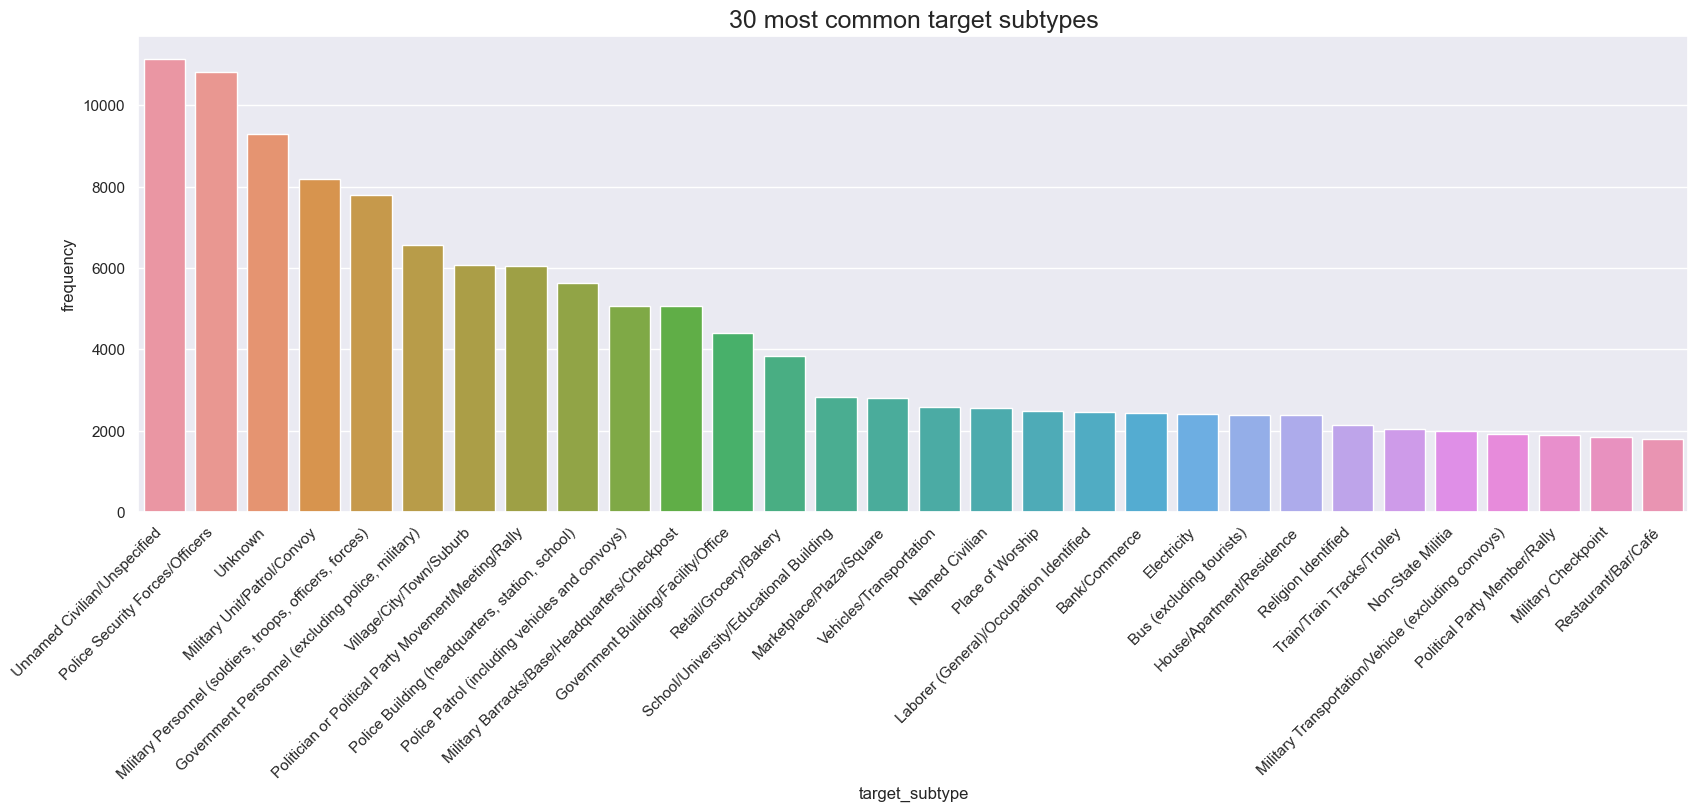

In [ ]:
# ... and vizualizate 30 most common of them

most_frequent(stats_target_subtype, 'target_subtype', '30 most common target subtypes', (20,7), 30)

In [ ]:
# Calculate statistics for attack_type

stats_attack_type = feature_stats(df, 'attack_type')
stats_attack_type.head(5)

attack_type  count
2               Bombing/Explosion  81404
0                   Armed Assault  41248
1                   Assassination  18887
6     Hostage Taking (Kidnapping)  10954
3  Facility/Infrastructure Attack   9232

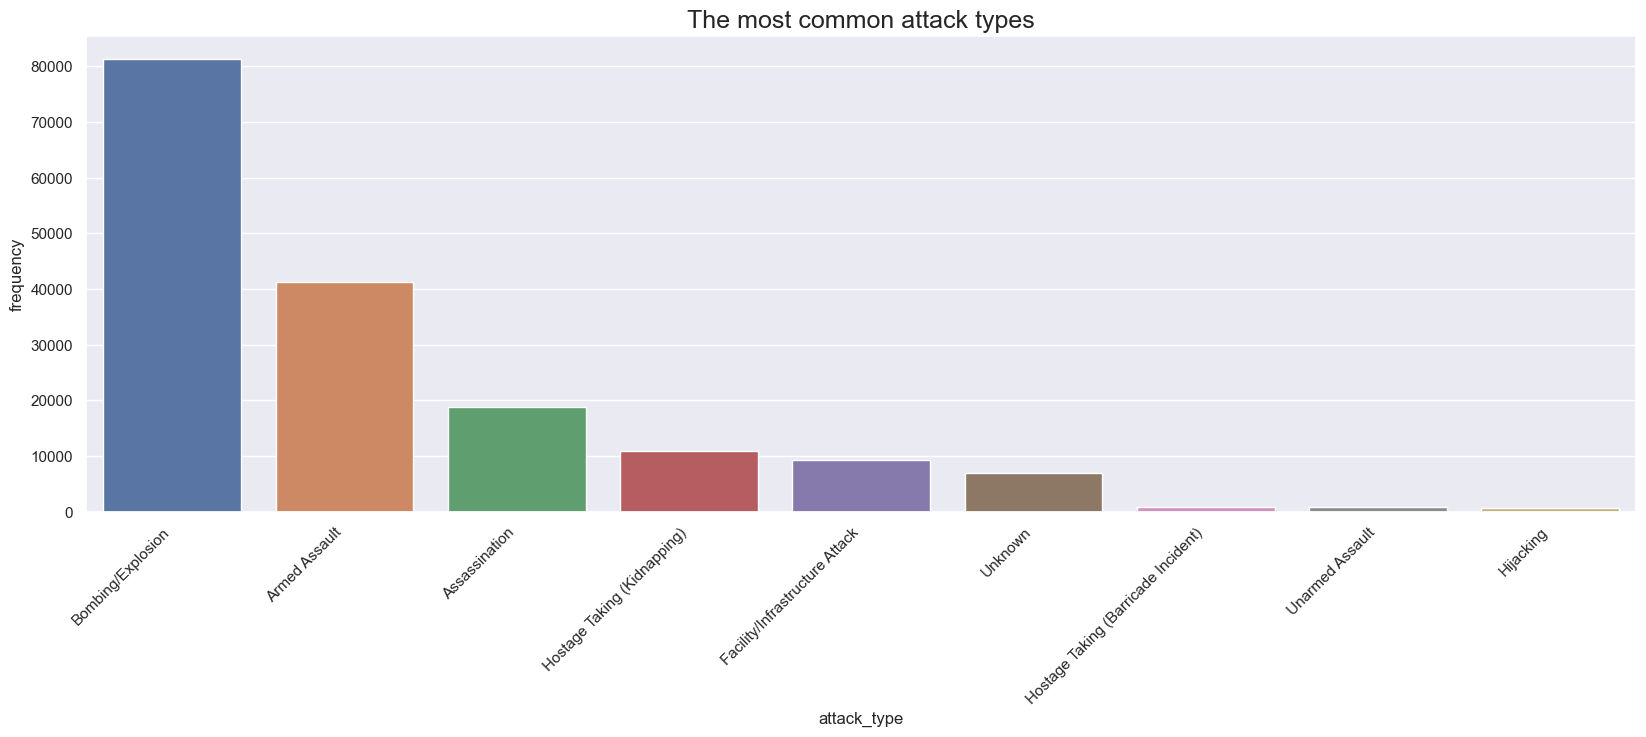

In [ ]:
# Vizualizate most common of them

most_frequent(stats_attack_type, 'attack_type', 'The most common attack types', (20,7), 'all')

In [ ]:
# Calculate statistics for terrorists nationality

stats_terrorists_nationality = feature_stats(df, 'terrorists_nationality')
stats_terrorists_nationality.head(5)

terrorists_nationality  count
86                    Iraq  22599
141               Pakistan  13284
82                   India  11681
0              Afghanistan  10689
36                Colombia   7123

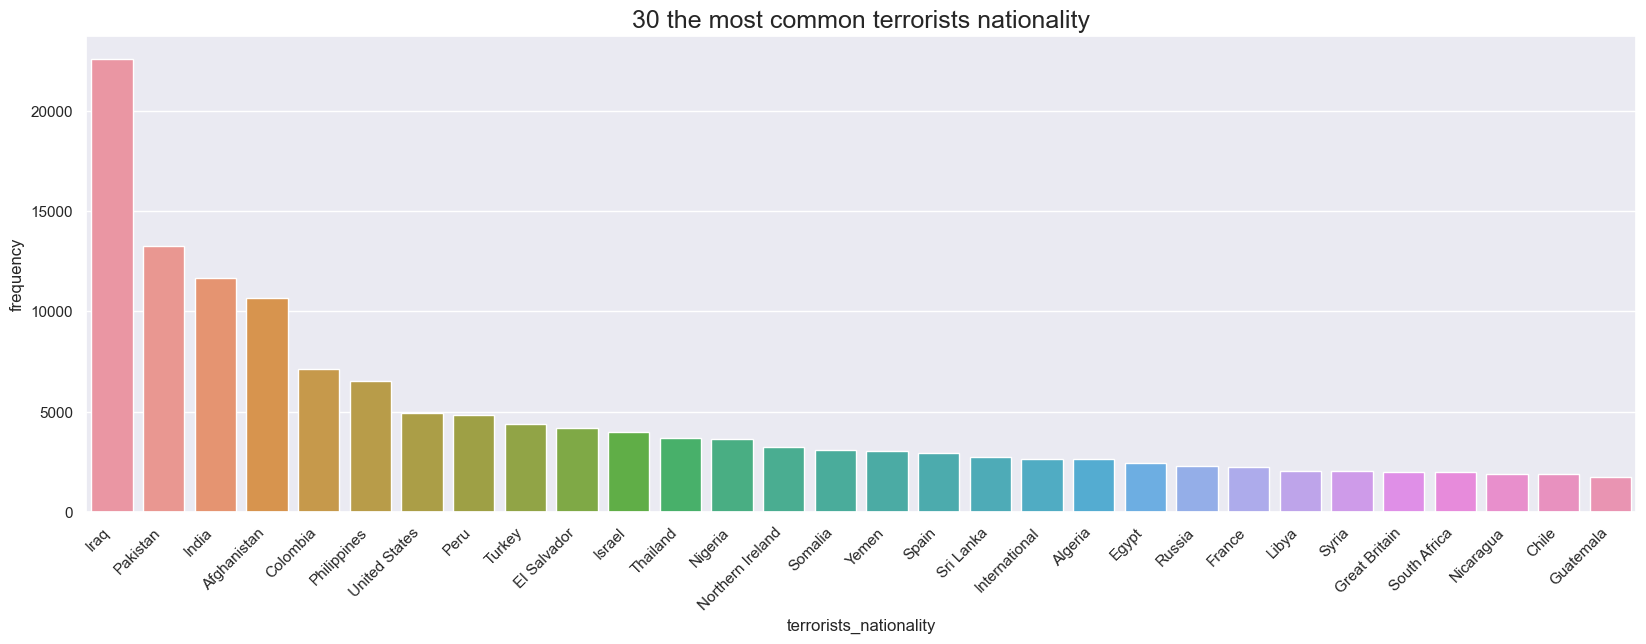

In [ ]:
# Vizualizate 30 most common of them

most_frequent(stats_terrorists_nationality, 'terrorists_nationality', '30 the most common terrorists nationality', (20,7), 30)

In [ ]:
# Calculate statistics for weap_type

stats_weap_type = feature_stats(df, 'weap_type')
stats_weap_type.head(5)

weap_type  count
2   Explosives  85597
4     Firearms  57304
10     Unknown  14459
5   Incendiary   9476
6        Melee   3530

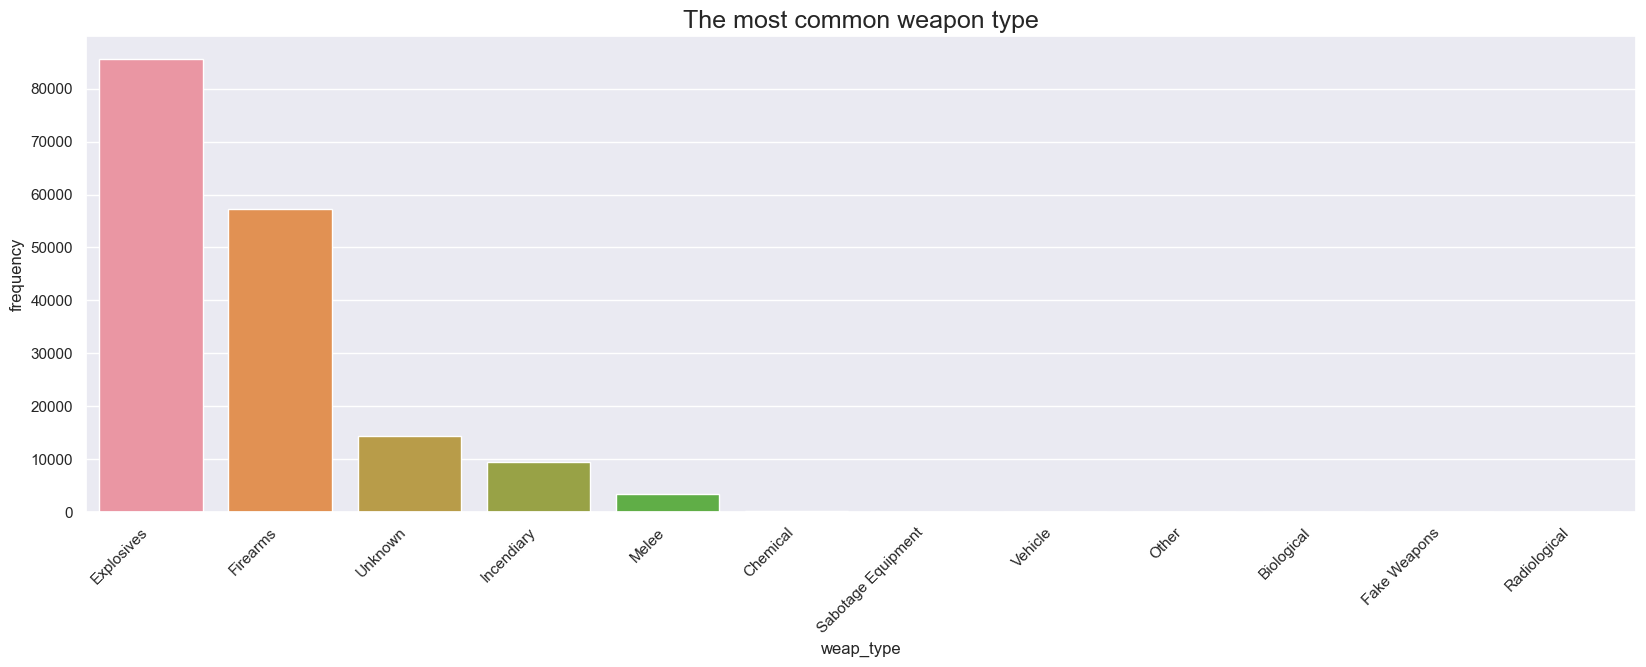

In [ ]:
# Vizualizate distribution of weapon type

most_frequent(stats_weap_type, 'weap_type', 'The most common weapon type', (20,7), 'all')

In [ ]:
# Calculate statistics for country

stats_country = feature_stats(df, 'country')
stats_country.head(5)

country  count
83          Iraq  23118
133     Pakistan  13724
0    Afghanistan  12478
79         India  11539
34      Colombia   7497

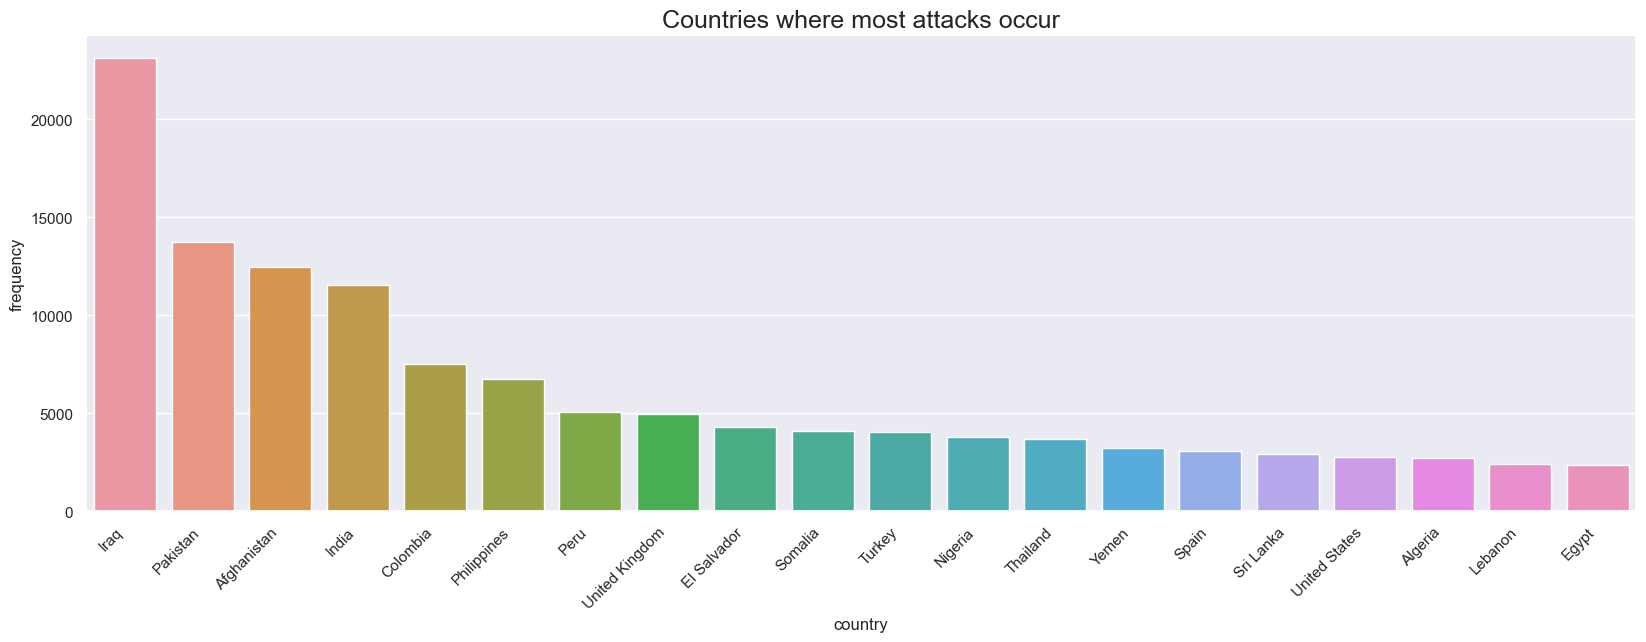

In [ ]:
# Vizualizate distribution of country

most_frequent(stats_country, 'country', 'Сountries where most attacks occur', (20,7), 20)

In [ ]:
# Calculate statistics for region

stats_region = feature_stats(df, 'region')
stats_region.head(5)

region  count
5   Middle East & North Africa  48118
8                   South Asia  43341
10          Sub-Saharan Africa  16979
7                South America  16594
11              Western Europe  15166

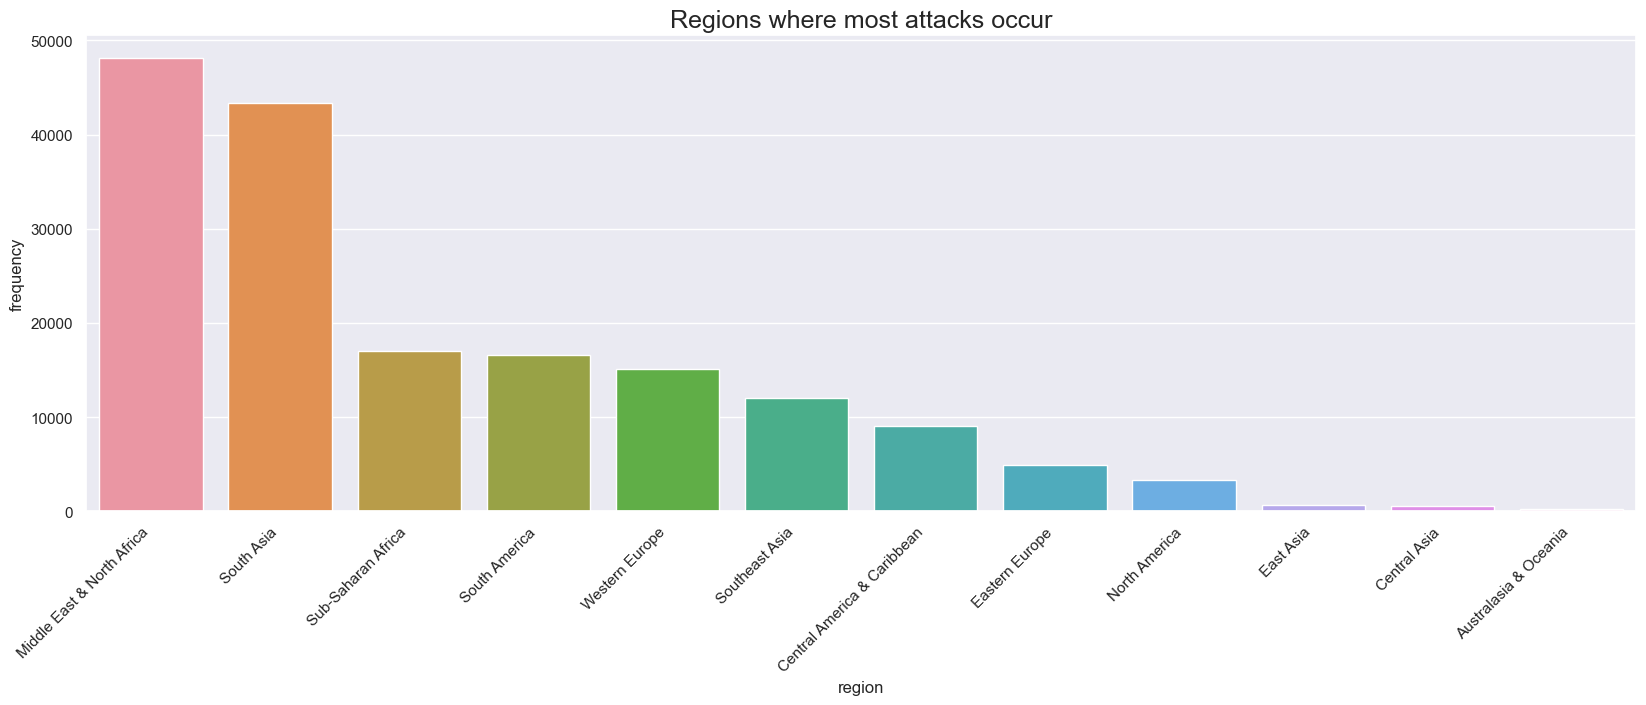

In [ ]:
# Vizualizate distribution of region

most_frequent(stats_region, 'region', 'Regions where most attacks occur', (20,7), 20)

In [ ]:
# Сalculate the number of wounded and killed, as well as the total number of victims by year

stats_killed_in_year = df.groupby(['year'], as_index=False)[['killed_number']].sum()
stats_wounded_in_year = df.groupby(['year'], as_index=False)[['wounded_number']].sum()
stats_total_victims_in_year = df.groupby(['year'], as_index=False)[['total_victims_num']].sum()

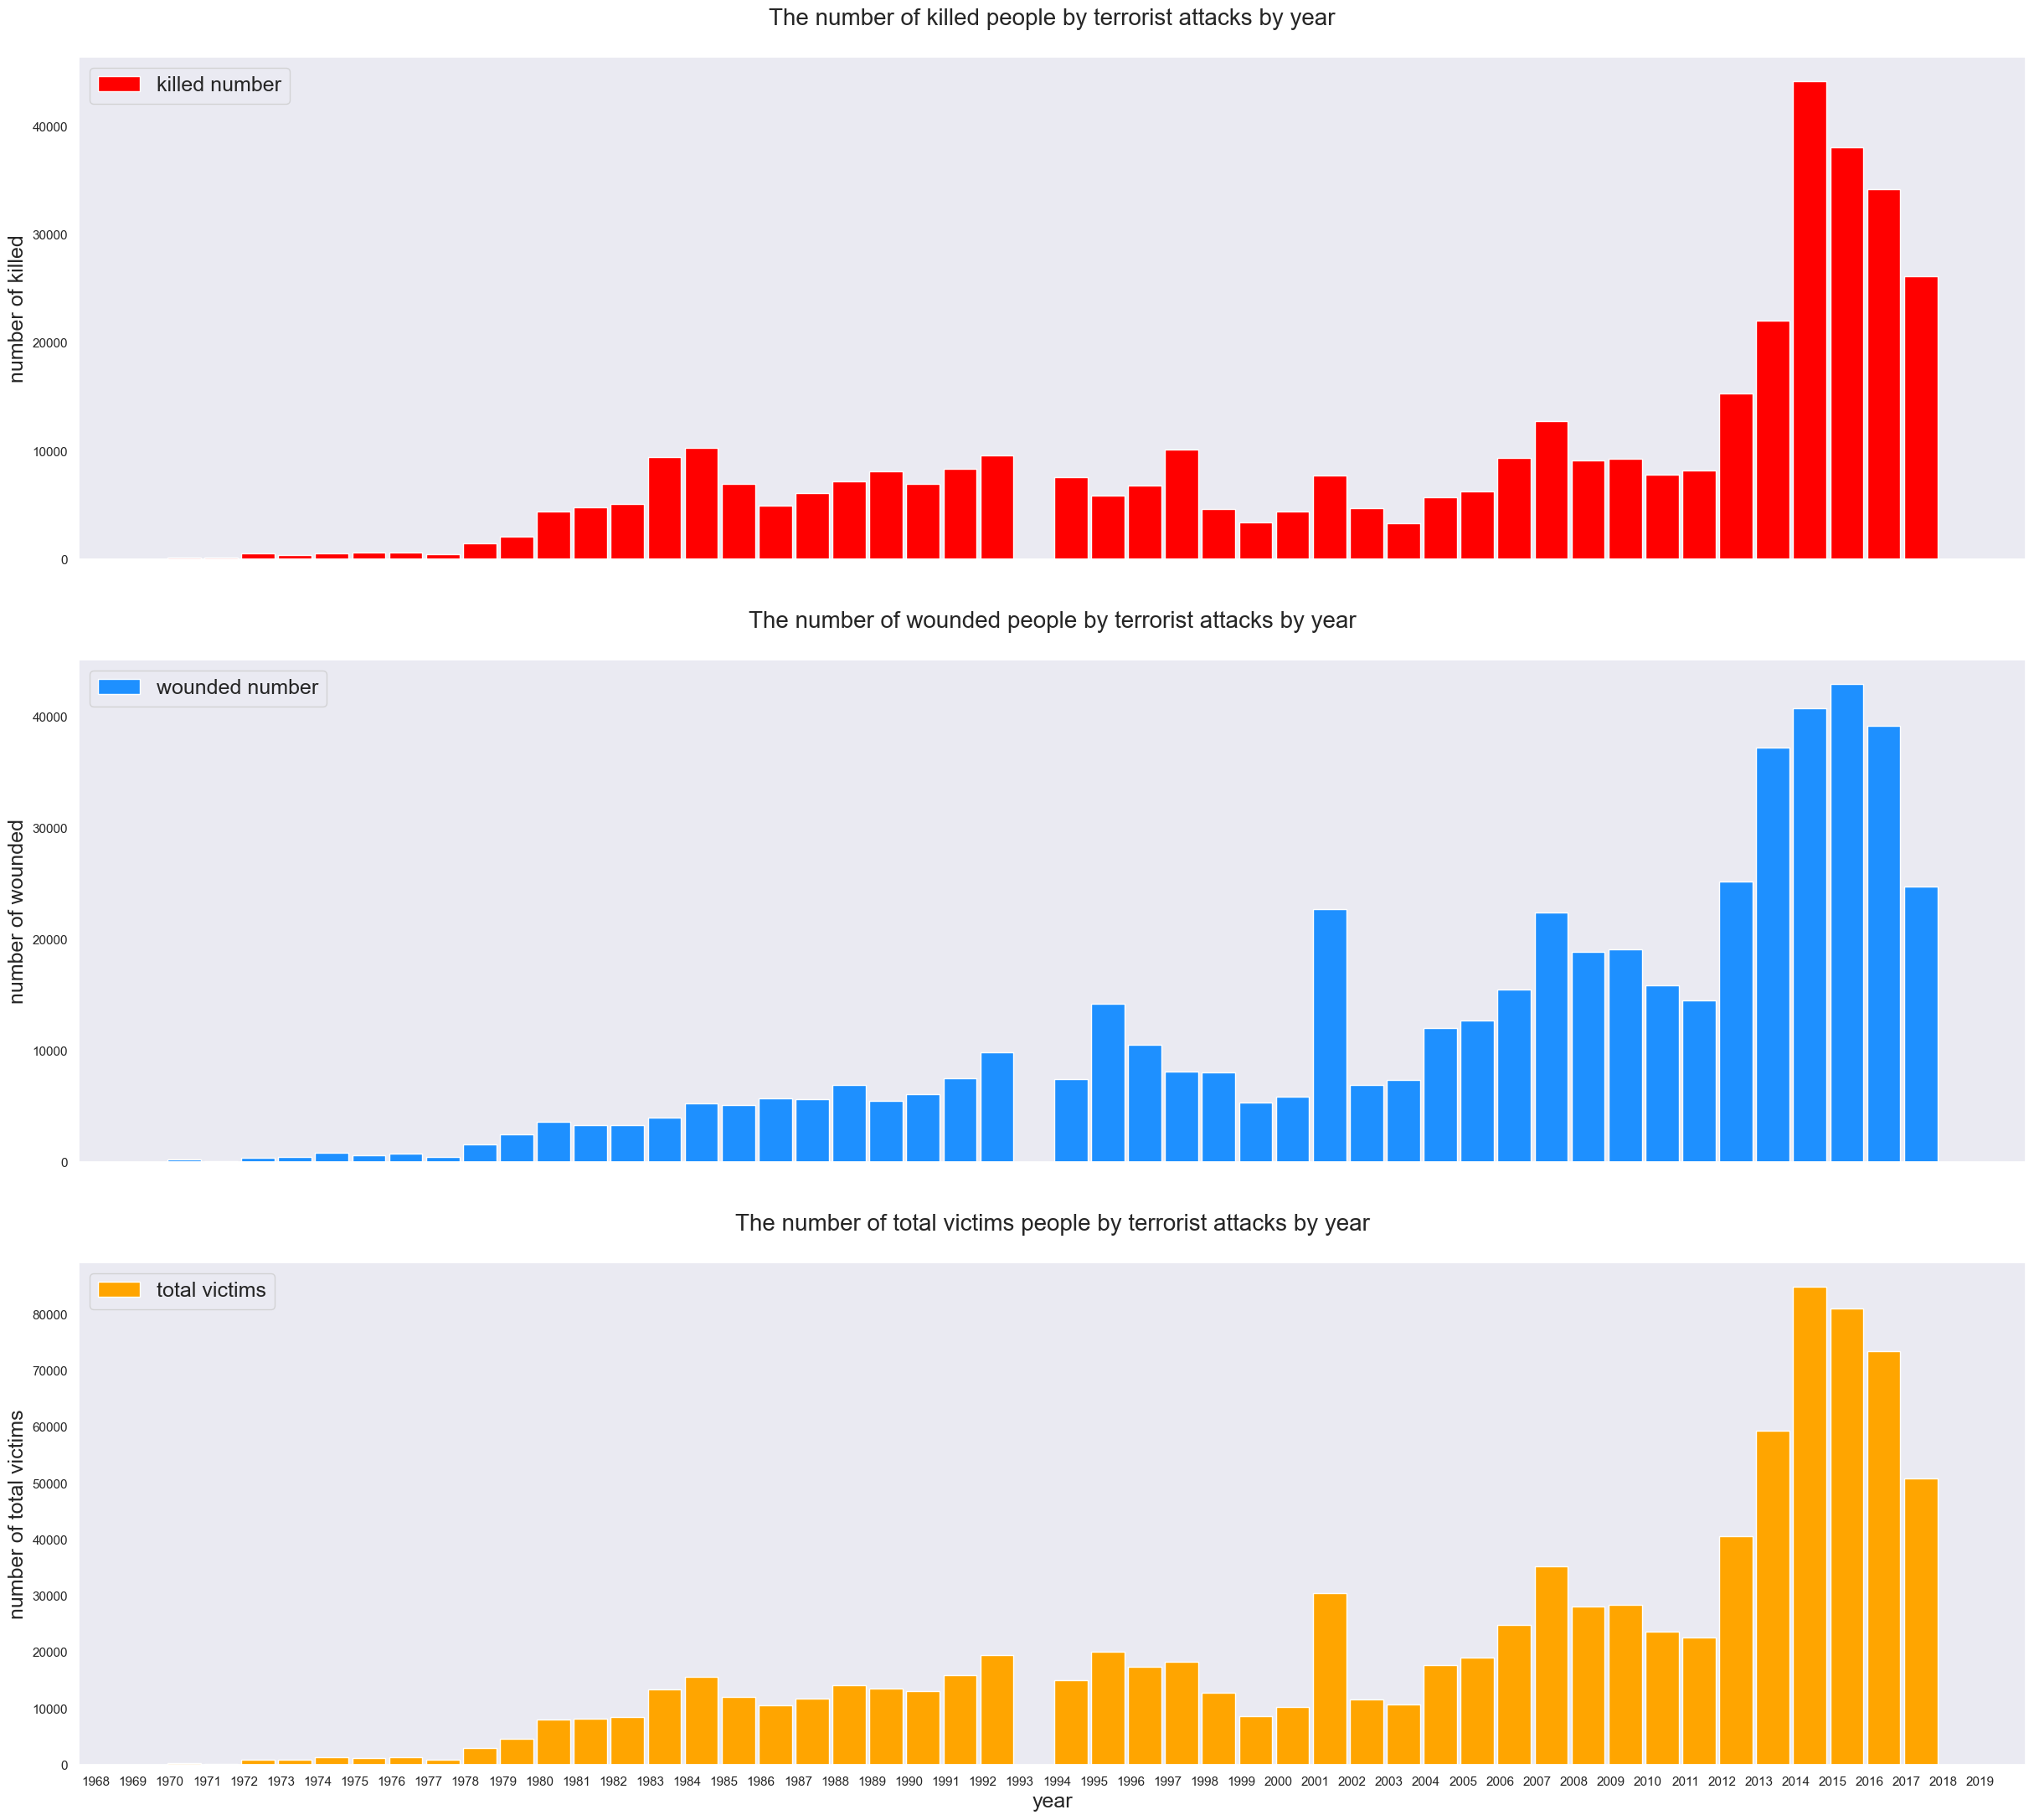

In [ ]:
# Vizualizate the number of wounded, killed and the total number of victims by year

fig, ax = plt.subplots(3, 1, figsize=(30, 30))
ax[0].bar(stats_killed_in_year['year'], stats_killed_in_year['killed_number'], width=0.9, color='red',
          label='killed number')
ax[1].bar(stats_wounded_in_year['year'], stats_wounded_in_year['wounded_number'], width=0.9, color='dodgerblue',
          label='wounded number')
ax[2].bar(stats_total_victims_in_year['year'], stats_total_victims_in_year['total_victims_num'], width=0.9, color='orange',
          label='total victims')

ax[0].legend(loc='upper left', fontsize = 18)
ax[1].legend(loc='upper left', fontsize = 18)
ax[2].legend(loc='upper left', fontsize = 18)

ax[0].set_title('The number of killed people by terrorist attacks by year\n', fontsize = 20)
ax[1].set_title('The number of wounded people by terrorist attacks by year\n', fontsize = 20)
ax[2].set_title('The number of total victims people by terrorist attacks by year\n', fontsize = 20)

ax[0].set_xlabel('year')
ax[1].set_xlabel('year')
ax[2].set_xlabel('year', fontsize = 18)

ax[0].set_ylabel('number of killed', fontsize = 18)
ax[1].set_ylabel('number of wounded', fontsize = 18)
ax[2].set_ylabel('number of total victims', fontsize = 18)

ax[0].xaxis.set_major_locator(ticker.MultipleLocator(1))
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(1))
ax[2].xaxis.set_major_locator(ticker.MultipleLocator(1))

ax[0].grid()
ax[1].grid()
ax[2].grid()

fig.autofmt_xdate(rotation=0);

In [ ]:
# Statistics of terrorist organizations from which the largest number of people suffered (without 'unknown')

stats_total_victims_by_tergroup = df.groupby(['terrorist_group_name'], as_index=False)[['total_victims_num']].sum()
stats_total_victims_by_tergroup = stats_total_victims_by_tergroup.sort_values(by='total_victims_num', ascending=False)
stats_total_victims_by_tergroup = stats_total_victims_by_tergroup.reset_index().drop(columns='index').loc[1:21,:]
stats_total_victims_by_tergroup.head(5)

terrorist_group_name  total_victims_num
1  Islamic State of Iraq and the Levant (ISIL)              68532
2                                      Taliban              56934
3                                   Boko Haram              29462
4                                     Al-Qaida              28372
5      Liberation Tigers of Tamil Eelam (LTTE)              21750

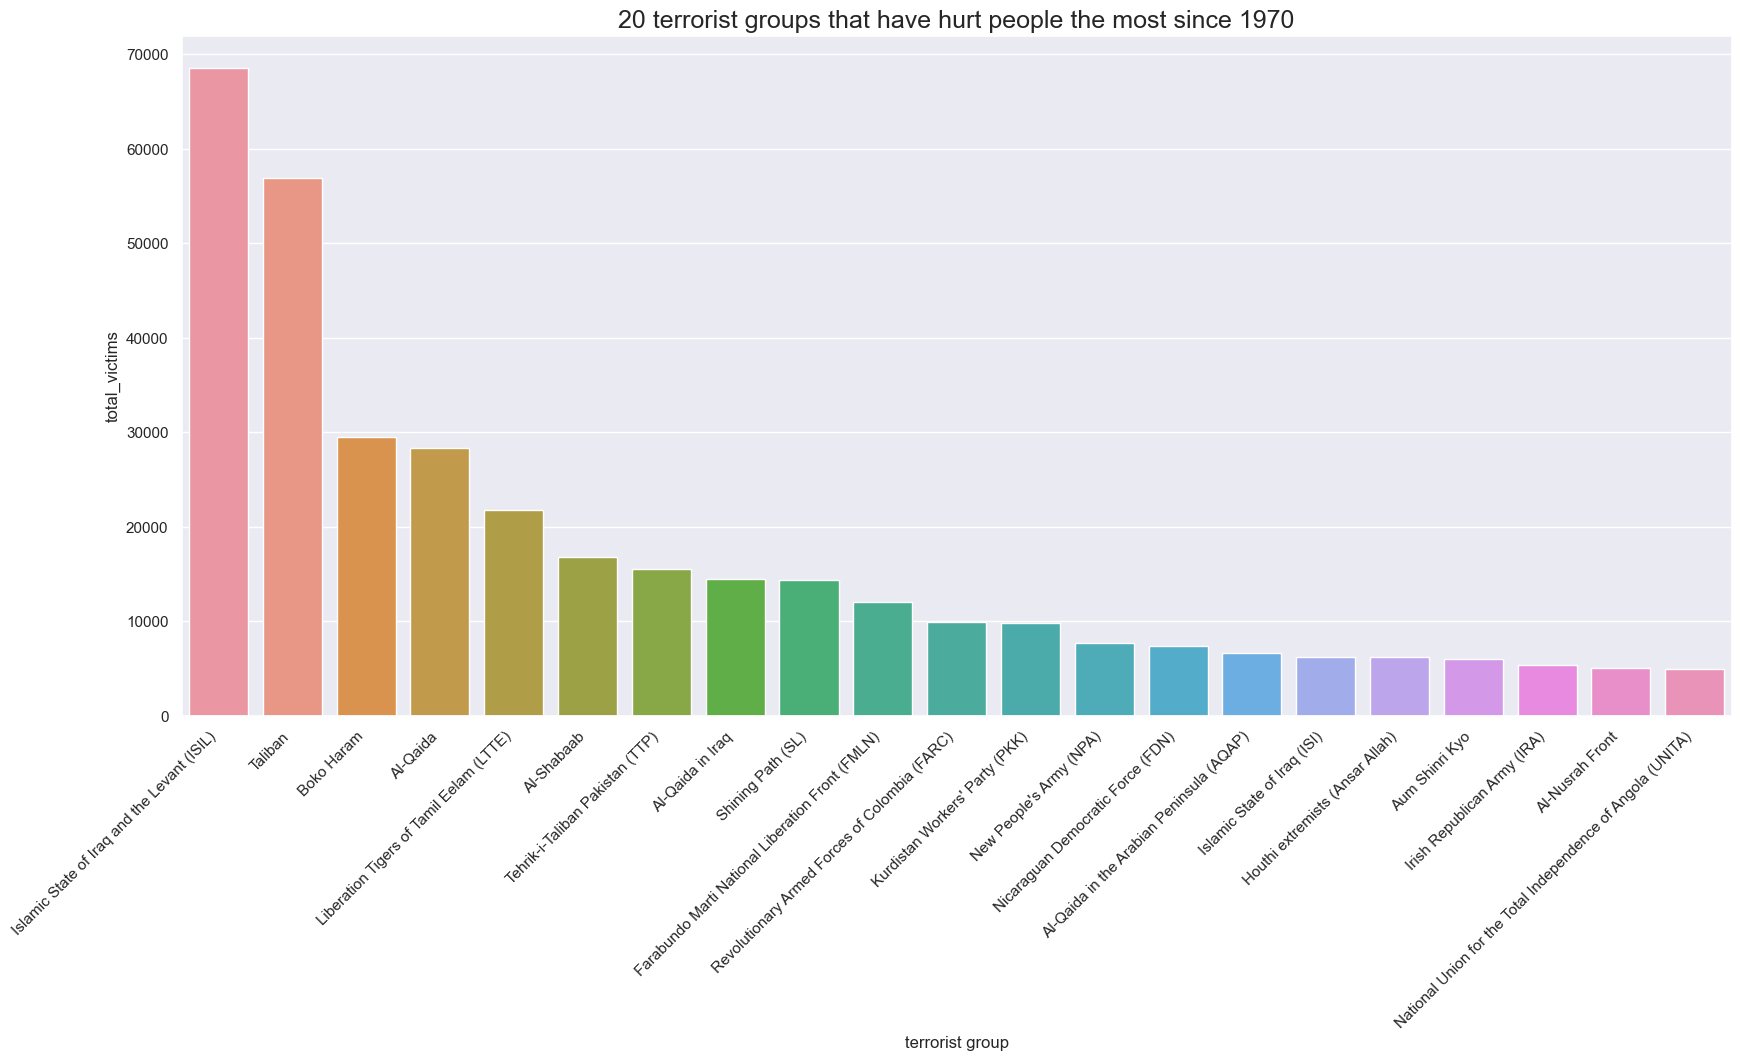

In [ ]:
# Chart of terrorist organizations from which the largest number of people suffered (without 'unknown')

fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(data=stats_total_victims_by_tergroup, x='terrorist_group_name', y='total_victims_num')
ax.set_xlabel('terrorist group')
ax.set_ylabel('total_victims')
ax.set_title('20 terrorist groups that have hurt people the most since 1970', fontsize = 18)
fig.autofmt_xdate(rotation=45);

In [ ]:
# Statistics of terrorist organizations from which the largest number of people suffered (without 'unknown')

stats_terrorist_group_name = df.groupby(['terrorist_group_name'], as_index=False)[['index']].count()
stats_terrorist_group_name = stats_terrorist_group_name.rename(columns={'index':
                            'number_attack'}).sort_values(by='number_attack', ascending=False)
stats_terrorist_group_name = stats_terrorist_group_name.reset_index().drop(columns='index').loc[1:21,:]
stats_terrorist_group_name.head()

terrorist_group_name  number_attack
1                                      Taliban           7280
2  Islamic State of Iraq and the Levant (ISIL)           5073
3                            Shining Path (SL)           3759
4                                   Al-Shabaab           3232
5                      New People's Army (NPA)           2695

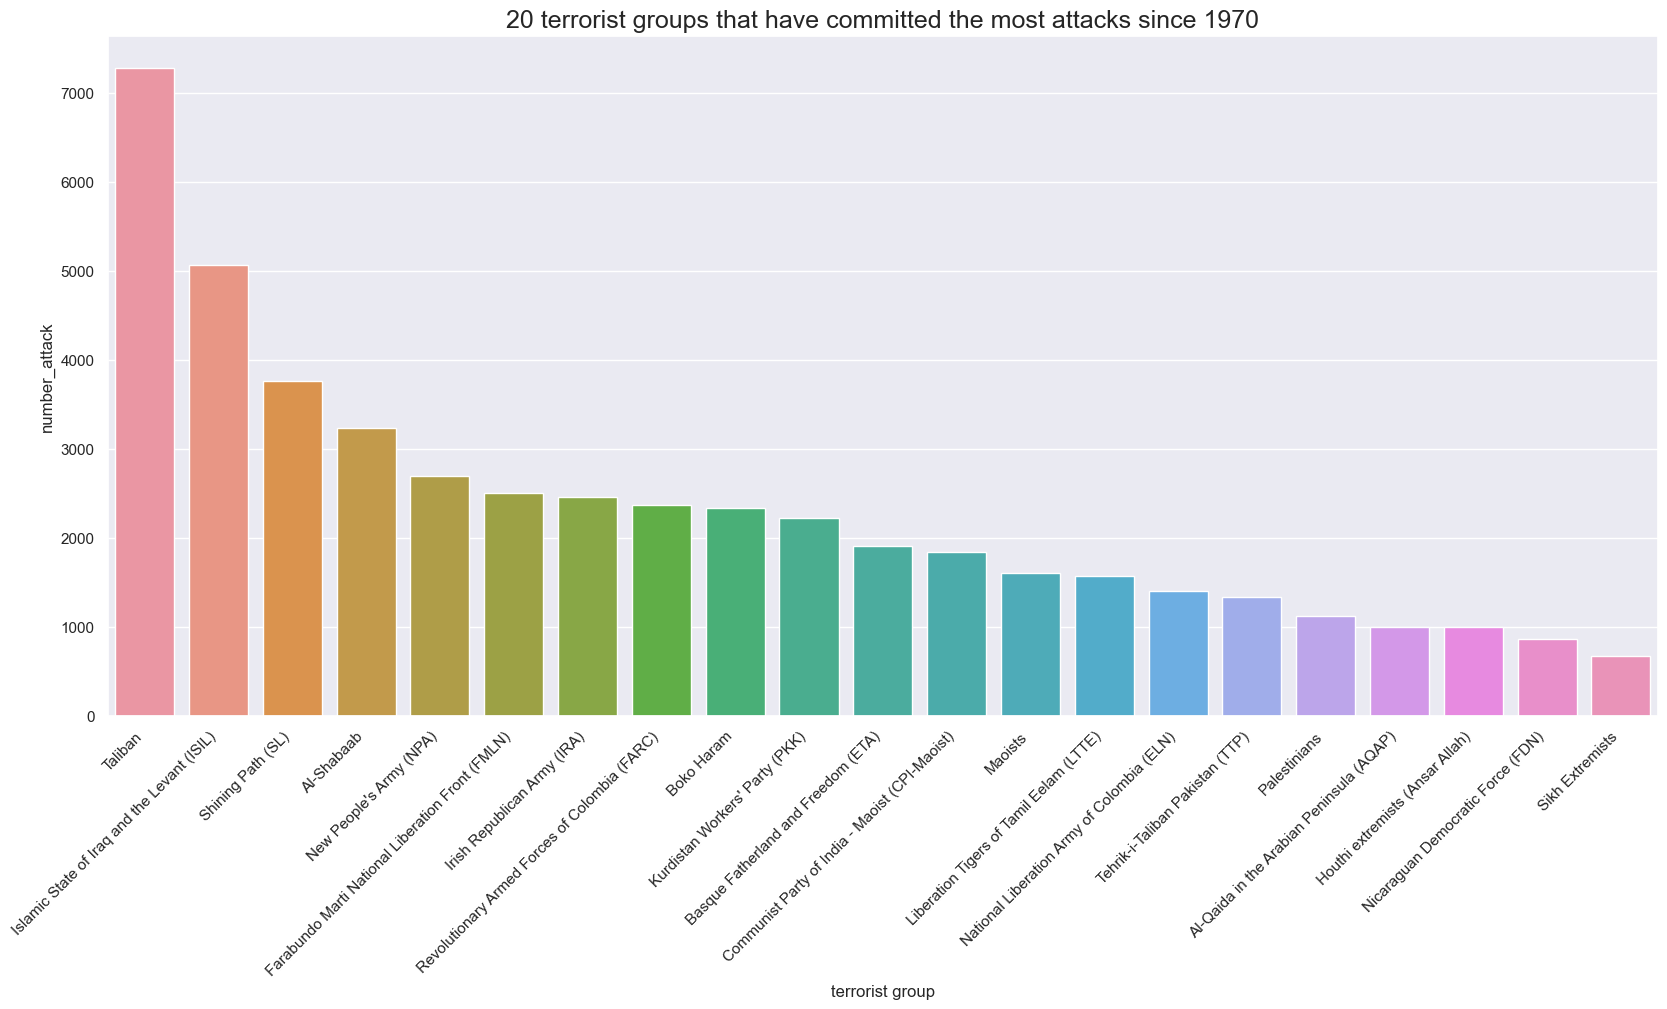

In [ ]:
# Chart of terrorist organizations that have committed the most terrorist attacks (without 'unknown')

fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(data=stats_terrorist_group_name, x='terrorist_group_name', y='number_attack')
ax.set_xlabel('terrorist group')
ax.set_ylabel('number_attack')
ax.set_title('20 terrorist groups that have committed the most attacks since 1970', fontsize = 18)
fig.autofmt_xdate(rotation=45);

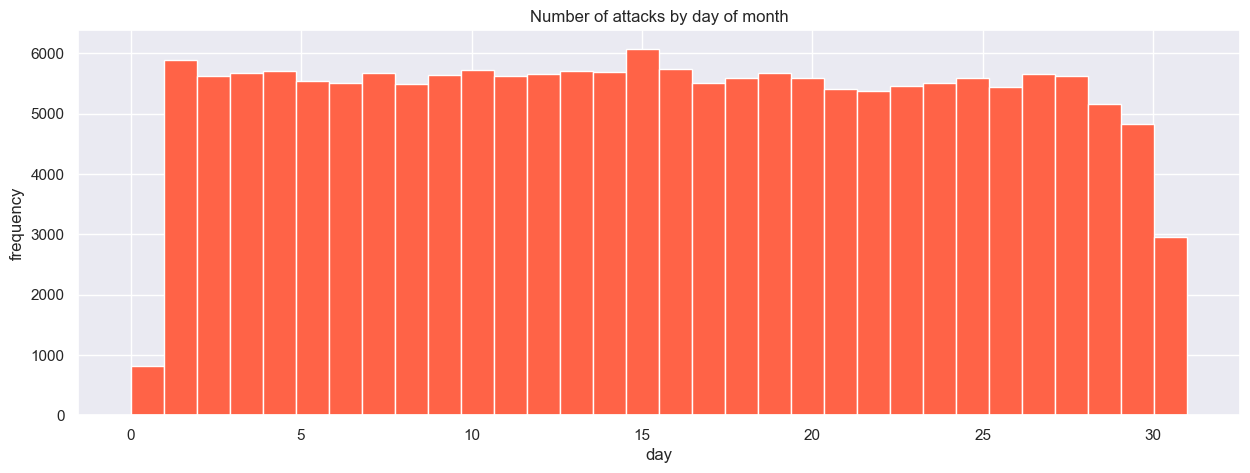

In [ ]:
# Conclusion of graphs of number of attacks by day of month

distribution_graph(df['day'], 'day', 'Number of attacks by day of month', df.day.nunique())

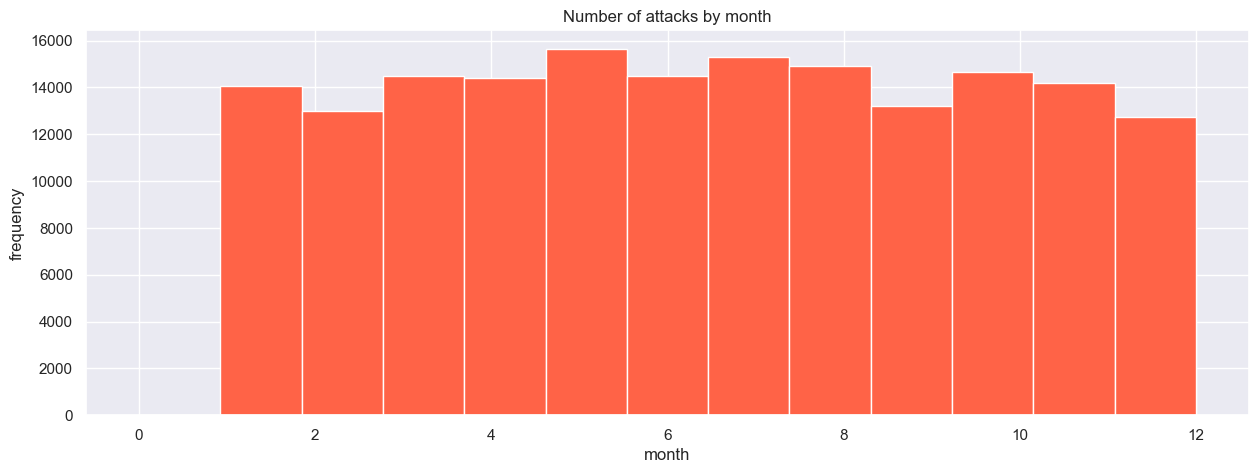

In [ ]:
# Conclusion of graphs of number of attacks by month

distribution_graph(df['month'], 'month', 'Number of attacks by month', df.month.nunique())

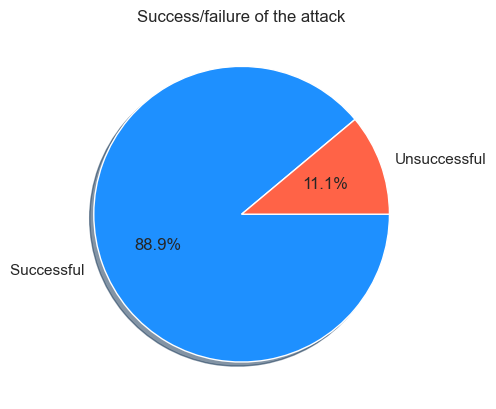

In [ ]:
# Chart success/failure of the attack

plt.pie(df.success.value_counts(), colors=['dodgerblue', 'tomato'],
        labels=['Successful ', 'Unsuccessful'], autopct='%1.1f%%', counterclock=False, shadow=True)
plt.title('Success/failure of the attack')
plt.show();

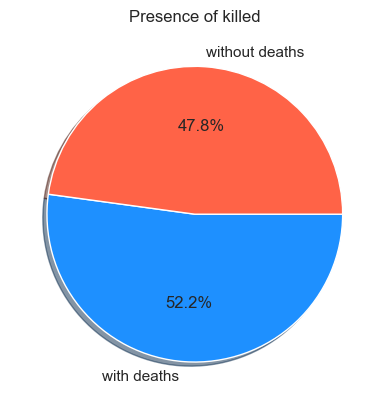

In [ ]:
# Presence or absence of those killed in the attack

plt.pie(df.killed_ny.value_counts(), colors=['dodgerblue', 'tomato'],
        labels=['with deaths ', 'without deaths'], autopct='%1.1f%%', counterclock=False, shadow=True)
plt.title('Presence of killed')
plt.show();

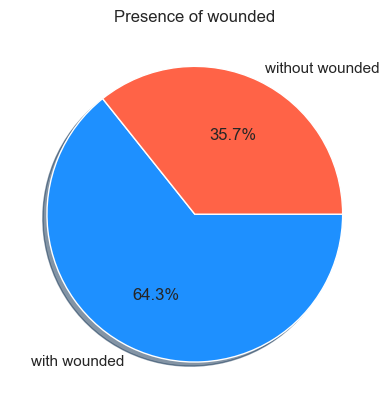

In [ ]:
# Presence or absence of those wounded in the attack

plt.pie(df.wounded_ny.value_counts(), colors=['dodgerblue', 'tomato'],
        labels=['with wounded', 'without wounded'], autopct='%1.1f%%', counterclock=False, shadow=True)
plt.title('Presence of wounded')
plt.show();

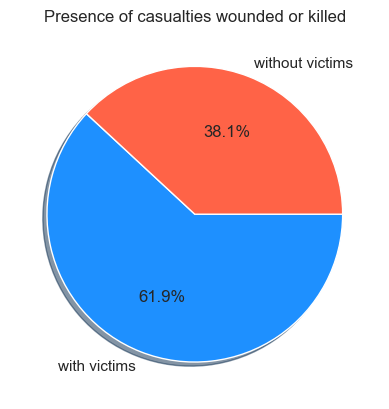

In [ ]:
# Presence or absence of those casualties wounded or killed in the attack

plt.pie(df.total_victims.value_counts(), colors=['dodgerblue', 'tomato'],
        labels=['with victims', 'without victims'], autopct='%1.1f%%', counterclock=False, shadow=True)
plt.title('Presence of casualties wounded or killed')
plt.show();

In [ ]:
lat = df.latitude.tolist()
lon = df.longitude.tolist()

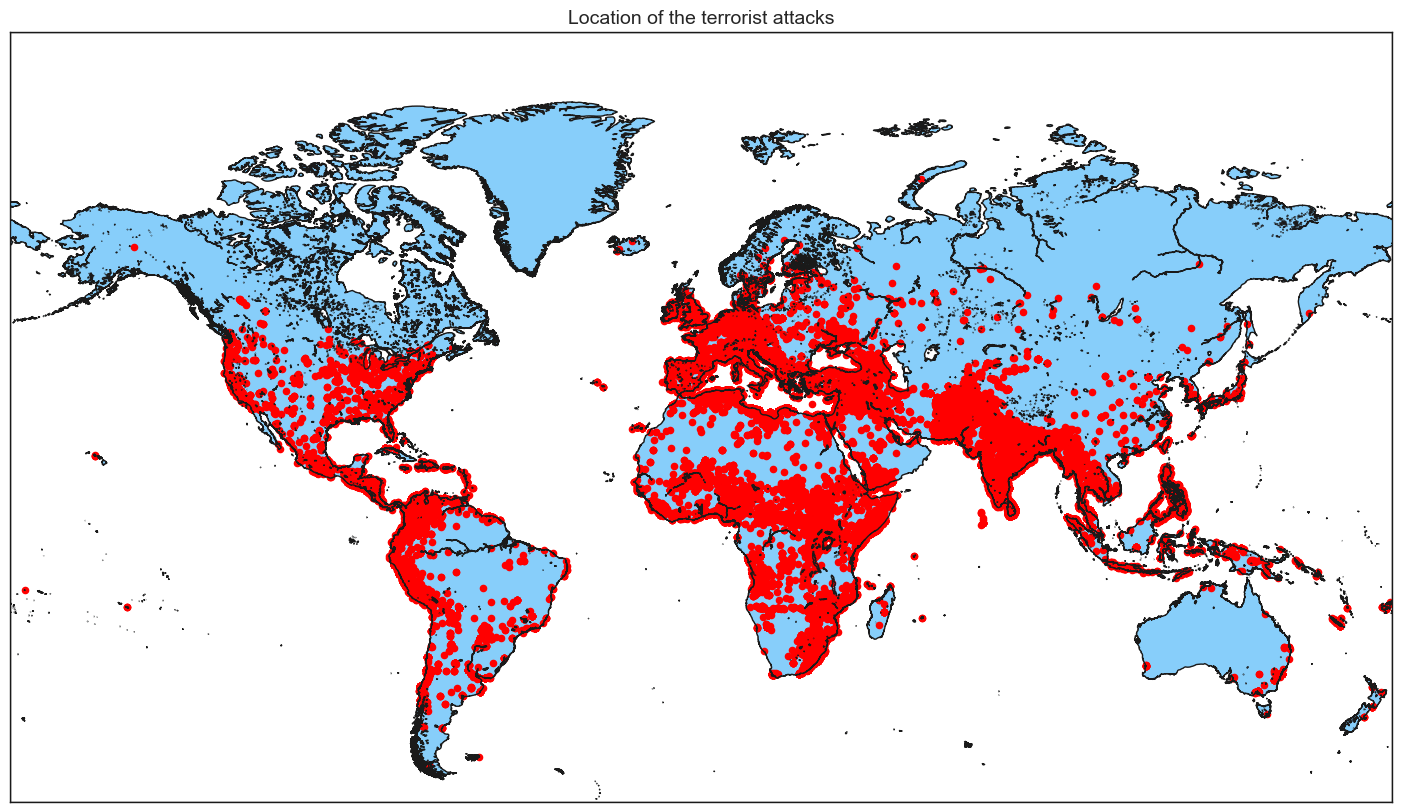

In [ ]:
# Display locations of terrorist attacks on the world map by coordinates

plt.figure(figsize=(20,10))
m = Basemap(projection='mill', lon_0=180, llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='h')
x, y = m(lon,lat)
m.drawcoastlines()
m.fillcontinents(color='lightskyblue',lake_color='white')
m.drawmapboundary(fill_color='white')

m.scatter(x,y,20,marker='o',color='red')
plt.title("Location of the terrorist attacks", fontsize=14)
plt.show()